# Stats 21 Final Project Code

## Aaron Chao - UID: 205551849

### An Analysis of Video Game Sales from 1980 to 2016

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#obtained from https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings
vgsales=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
vgsales.head(4)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [4]:
vgsales["Year_of_Release"].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year_of_Release, dtype: int64

In [5]:
vgsales.shape

(16719, 16)

In [6]:
vgsales[vgsales["Year_of_Release"] == 2017]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.04,0.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
vgsales[vgsales["Year_of_Release"] == 2020]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E


In [8]:
vgsales = vgsales.drop(labels = [5936, 14086, 16222, 16385], axis = 0)

Here, we are dropping the rows with the year of release that is equal to 2017 or 2020. This dataset includes video game data as of December 2016, so these data values are inaccurate and therefore, meaningless to us.

In [9]:
vgsales["Year_of_Release"].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

In [10]:
vgsales.shape

(16715, 16)

We have successfully edited the dataset, so we will begin our analysis of the dataset.

### 1. How has the number of sales in video games changed over time? Do certain video game genres tend to sell better than other genres? How about the publisher of the video game, video game’s platform, and ESRB rating, and Metacritic score?

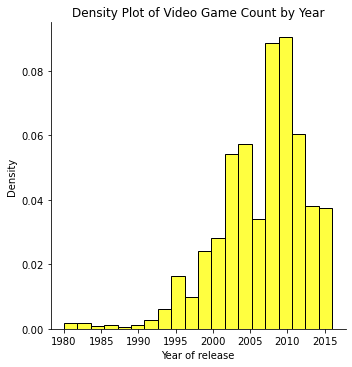

In [11]:
sns.displot(data = vgsales, x = "Year_of_Release", bins = 20, stat = "density", color = "yellow");
plt.xlabel("Year of release")
plt.title("Density Plot of Video Game Count by Year")
plt.savefig("Fig1.pdf",dpi=300, bbox_inches = "tight");

This density plot shows a higher concentration of games being released in the years after 2005 compared to before 2005.

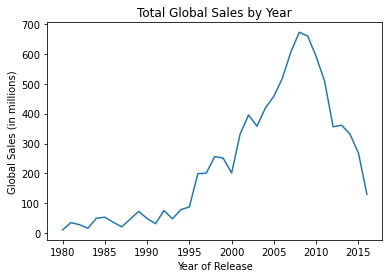

In [12]:
vgsales.groupby("Year_of_Release")["Global_Sales"].sum().plot()
plt.xlabel("Year of Release")
plt.ylabel("Global Sales (in millions)")
plt.title("Total Global Sales by Year")
plt.savefig("Fig2.pdf",dpi=300, bbox_inches = "tight");

Video game sales have risen from 1980 to 2008, and peaked in 2008. Sales decrease fast after 2008.

In [13]:
vgsales.groupby("Year_of_Release")["Global_Sales"].sum()

Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     48.40
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    671.79
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.51
2015.0    268.05
2016.0    130.10
Name: Global_Sales, dtype: float64

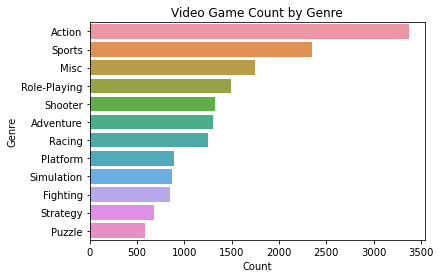

In [14]:
sns.countplot(y = "Genre", data = vgsales, order = vgsales["Genre"].value_counts().index)
plt.ylabel("Genre")
plt.xlabel("Count")
plt.title("Video Game Count by Genre")
plt.savefig("Fig3.pdf",dpi=300, bbox_inches = "tight");

Most video games are action games.

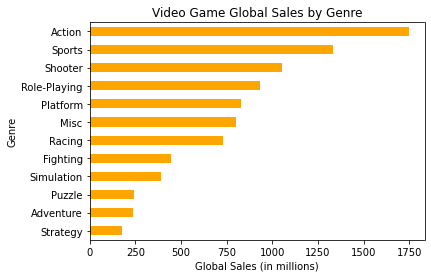

In [15]:
vgsales.groupby("Genre")["Global_Sales"].sum().sort_values(ascending = True).plot(kind = "barh", color = "orange")
plt.ylabel("Genre")
plt.xlabel("Global Sales (in millions)")
plt.title("Video Game Global Sales by Genre")
plt.savefig("Fig4.pdf",dpi=300, bbox_inches = "tight");

Top selling genres are action, sports, and shooters.

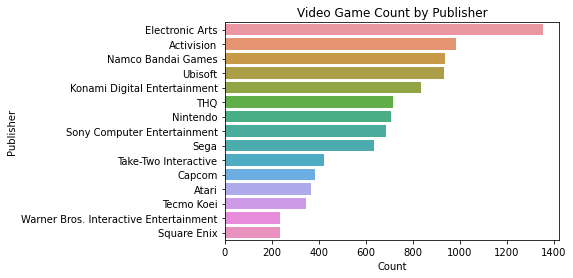

In [16]:
sns.countplot(y = "Publisher", data = vgsales, order = vgsales["Publisher"].value_counts().iloc[:15].index)
plt.xlabel("Count")
plt.title("Video Game Count by Publisher")
plt.savefig("Fig5.pdf",dpi=300, bbox_inches = "tight");

Electronic Arts produced the most video games, which is a lot more than other publishers.

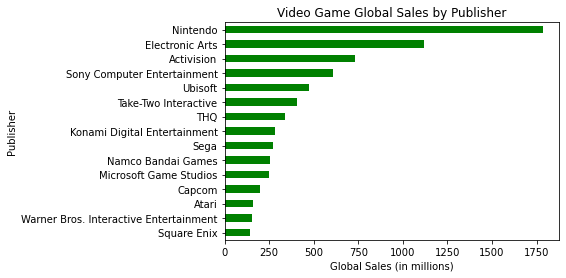

In [17]:
vgsales.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending = True).tail(15).plot(kind = "barh", color = "green")
plt.xlabel("Global Sales (in millions)")
plt.ylabel("Publisher")
plt.title("Video Game Global Sales by Publisher")
plt.savefig("Fig6.pdf",dpi=300, bbox_inches = "tight");

Nintendo has sold the most video game units globally, followed by Electronic Arts and Activision.

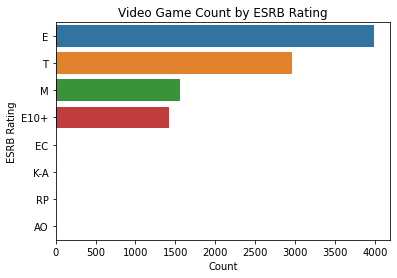

In [18]:
#Not included in analysis paper
sns.countplot(y = "Rating", data = vgsales, order = vgsales["Rating"].value_counts().index)
plt.xlabel("Count")
plt.ylabel("ESRB Rating")
plt.title("Video Game Count by ESRB Rating")
plt.savefig("Fig7.pdf",dpi=300, bbox_inches = "tight");

Most video games produced are rated E, not surprisingly.

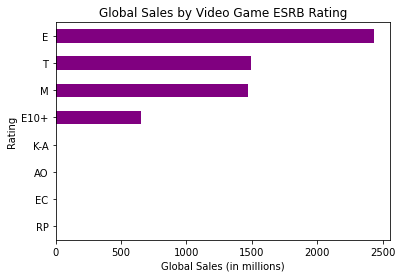

In [19]:
vgsales.groupby("Rating")["Global_Sales"].sum().sort_values(ascending = True).plot(kind = "barh", color = "purple")
plt.xlabel("Global Sales (in millions)")
plt.title("Global Sales by Video Game ESRB Rating")
plt.savefig("Fig8.pdf",dpi=300, bbox_inches = "tight");

Rated E games account for most of the global sales. Rated T and rated M games have about the same number of global sales.

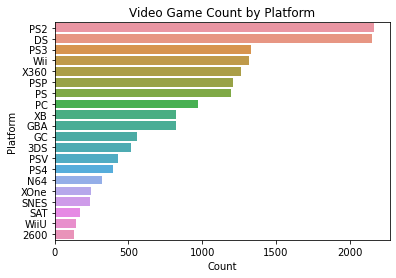

In [20]:
#not included in analysis paper
sns.countplot(y = "Platform", data = vgsales, order = vgsales["Platform"].value_counts().iloc[:20].index)
plt.xlabel("Count")
plt.title("Video Game Count by Platform")
plt.savefig("Fig9.pdf",dpi=300, bbox_inches = "tight");

Most video games produced are for the PS2 and the DS.

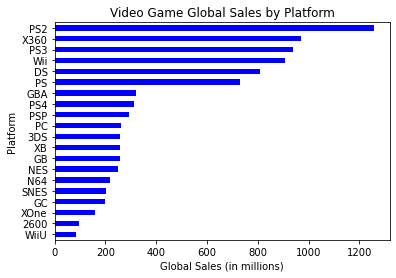

In [21]:
vgsales.groupby("Platform")["Global_Sales"].sum().nlargest(20).sort_values(ascending = True).plot(kind = "barh", color = "Blue")
plt.xlabel("Global Sales (in millions)")
plt.title("Video Game Global Sales by Platform")
plt.savefig("Fig10.pdf",dpi=300, bbox_inches = "tight");

PS2 sells the most video games (more than 1200 million global sales).

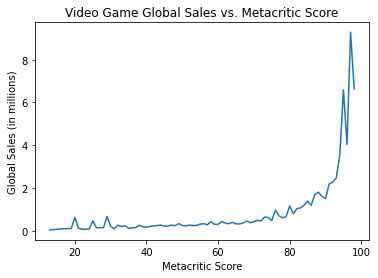

In [22]:
vgsales.groupby("Critic_Score")["Global_Sales"].mean().plot()
plt.ylabel("Global Sales (in millions)")
plt.xlabel("Metacritic Score")
plt.title("Video Game Global Sales vs. Metacritic Score")
plt.savefig("Fig11.pdf",dpi=300, bbox_inches = "tight");

We take the average global sales for each Metacritic score and plot it in a graph. The plot above shows that as Metacritic score increases, so does the global sales.

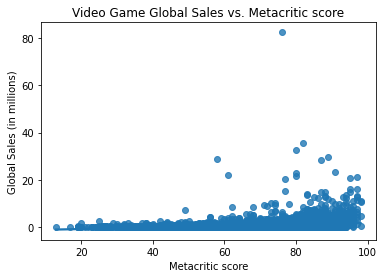

In [23]:
#Not used in analysis paper
drop_na_metascore = vgsales.dropna(subset = ["Critic_Score"]) #Drop data with missing critic score
sns.regplot(x = "Critic_Score", y = "Global_Sales", data = drop_na_metascore)
plt.title("Video Game Global Sales vs. Metacritic score")
plt.xlabel("Metacritic score")
plt.ylabel("Global Sales (in millions)")
plt.savefig("Fig12.pdf",dpi=300, bbox_inches = "tight");

The scatterplot doesn't show any correlation in Metacritic score and global sales.

These plots will help us answer my first research question.

### 2. What do top selling video games have in common?


In [24]:
top = vgsales.nlargest(n = 100, columns = ["Global_Sales"])
top

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58,NaN,NaN,NaN,NaN,NaN,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3.27,1.37,2.43,0.48,7.55,NaN,NaN,NaN,NaN,NaN,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,Nintendo,3.56,2.35,0.98,0.62,7.51,97.0,87.0,9.1,1854.0,Nintendo EAD Tokyo,E
98,Super Mario Bros. 2,NES,1988.0,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46,NaN,NaN,NaN,NaN,NaN,NaN


We find the top 100 video games with the highest global sales.

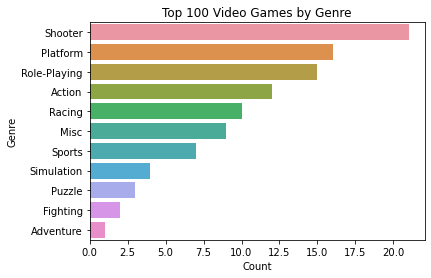

In [25]:
sns.countplot(y = "Genre", data = top, order = top["Genre"].value_counts().index)
plt.title("Top 100 Video Games by Genre")
plt.xlabel("Count")
plt.savefig("Fig13.pdf",dpi=300, bbox_inches = "tight");

In [26]:
top["Genre"].value_counts()

Shooter         21
Platform        16
Role-Playing    15
Action          12
Racing          10
Misc             9
Sports           7
Simulation       4
Puzzle           3
Fighting         2
Adventure        1
Name: Genre, dtype: int64

Shooters, platforms, and role-playing games are the most popular genres for the top 100 video games.

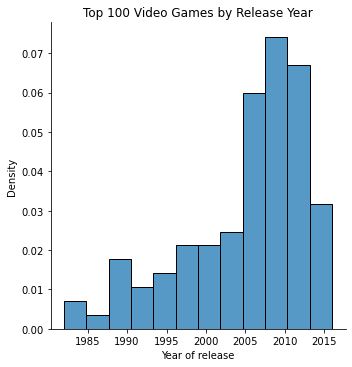

In [27]:
sns.displot(data = top, x = "Year_of_Release", bins = 12, stat = "density");
plt.xlabel("Year of release")
plt.title("Top 100 Video Games by Release Year")
plt.savefig("Fig14.pdf",dpi=300, bbox_inches = "tight");

Most of the top 100 video games were released after 2005.

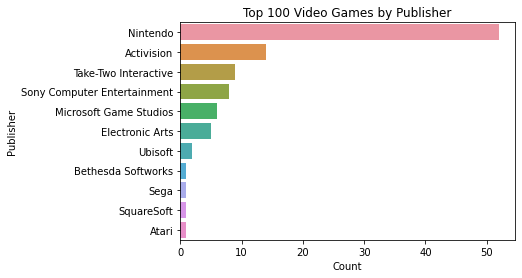

In [28]:
sns.countplot(y = "Publisher", data = top, order = top["Publisher"].value_counts().index)
plt.title("Top 100 Video Games by Publisher")
plt.xlabel("Count")
plt.savefig("Fig15.pdf",dpi=300, bbox_inches = "tight");

Nintendo makes very successful video games that sell well globally. Nintendo dominates the video game industry.

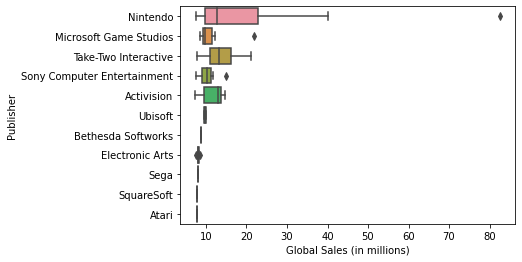

In [29]:
sns.boxplot(data = top, x = "Global_Sales", y = "Publisher")
plt.xlabel("Global Sales (in millions)")
plt.savefig("Fig16.pdf",dpi=300, bbox_inches = "tight");

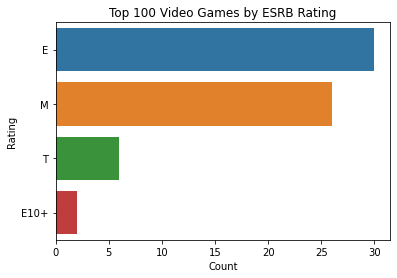

In [30]:
sns.countplot(y = "Rating", data = top, order = top["Rating"].value_counts().index)
plt.title("Top 100 Video Games by ESRB Rating")
plt.xlabel("Count")
plt.savefig("Fig17.pdf",dpi=300, bbox_inches = "tight");

In [31]:
top["Rating"].value_counts()

E       30
M       26
T        6
E10+     2
Name: Rating, dtype: int64

Most of the top 100 video games are rated E or rated M.

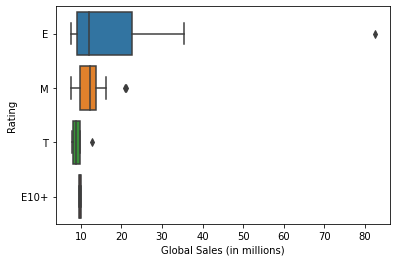

In [32]:
#Not used in analysis paper
sns.boxplot(data = top, x = "Global_Sales", y = "Rating")
plt.xlabel("Global Sales (in millions)")
plt.savefig("Fig18.pdf",dpi=300, bbox_inches = "tight");

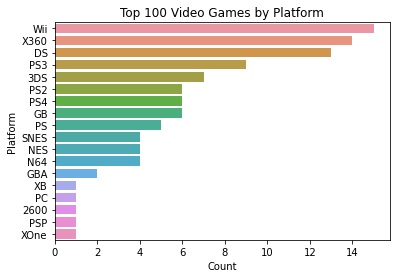

In [33]:
sns.countplot(y = "Platform", data = top, order = top["Platform"].value_counts().index)
plt.title("Top 100 Video Games by Platform")
plt.xlabel("Count")
plt.savefig("Fig19.pdf",dpi=300, bbox_inches = "tight");

Many of the best selling video games were made for the Wii, Xbox 360, and DS. These consoles were released in between 2004-2006.

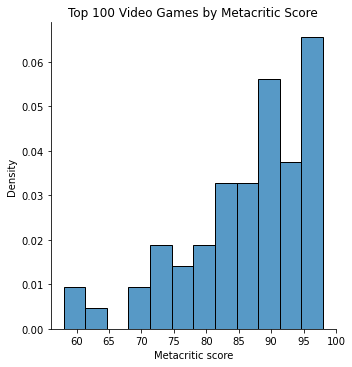

In [34]:
sns.displot(data = top, x = "Critic_Score", bins = 12, stat = "density");
plt.xlabel("Metacritic score")
plt.title("Top 100 Video Games by Metacritic Score")
plt.savefig("Fig20.pdf",dpi=300, bbox_inches = "tight");

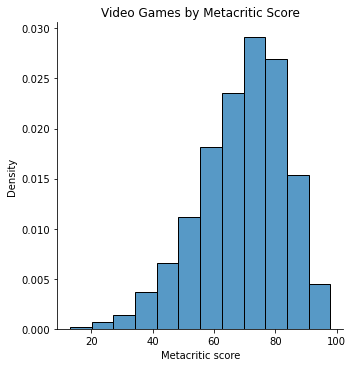

In [35]:
sns.displot(data = vgsales, x = "Critic_Score", bins = 12, stat = "density")
plt.xlabel("Metacritic score")
plt.title("Video Games by Metacritic Score")
plt.savefig("Fig21.pdf", dpi = 300, bbox_inches = "tight");

The best selling video games have high Metacritic scores.

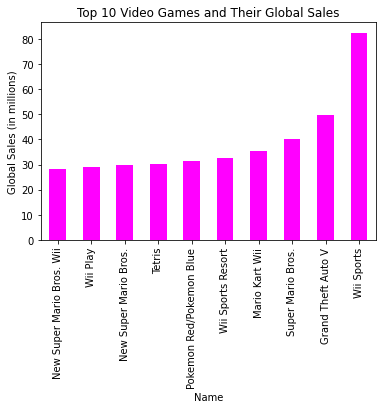

In [36]:
top.groupby("Name")["Global_Sales"].sum().nlargest(10).sort_values(ascending = True).plot(kind = "bar", color = "magenta")
plt.ylabel("Global Sales (in millions)")
plt.title("Top 10 Video Games and Their Global Sales")
plt.savefig("Fig23.pdf",dpi=300, bbox_inches = "tight");

9/10 of these games were published by Nintendo.

In [37]:
top.groupby("Name")["Global_Sales"].sum().nlargest(10)

Name
Wii Sports                   82.53
Grand Theft Auto V           49.92
Super Mario Bros.            40.24
Mario Kart Wii               35.52
Wii Sports Resort            32.77
Pokemon Red/Pokemon Blue     31.37
Tetris                       30.26
New Super Mario Bros.        29.80
Wii Play                     28.92
New Super Mario Bros. Wii    28.32
Name: Global_Sales, dtype: float64

### Which continent consumes the most video games? Is there a difference in video game interest depending on the region?

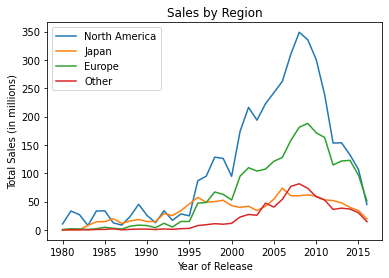

In [38]:
vgsales.groupby("Year_of_Release")["NA_Sales"].sum().plot()
vgsales.groupby("Year_of_Release")["JP_Sales"].sum().plot()
vgsales.groupby("Year_of_Release")["EU_Sales"].sum().plot()
vgsales.groupby("Year_of_Release")["Other_Sales"].sum().plot()
plt.legend(["North America", "Japan", "Europe", "Other"])
plt.xlabel("Year of Release")
plt.ylabel("Total Sales (in millions)")
plt.title("Sales by Region")
plt.savefig("Fig24.pdf",dpi=300, bbox_inches = "tight");

More people in North America and Europe purchase video games compared to the rest of the world. But we see a decrease in sales after 2008.

Let's sum the total sales for each region. And then create a dataframe.

In [39]:
NA = vgsales["NA_Sales"].sum()
JP = vgsales["JP_Sales"].sum()
EU = vgsales["EU_Sales"].sum()
Other = vgsales["Other_Sales"].sum()

In [40]:
Region_Sales = pd.DataFrame({"Region": ["North America", "Japan", "Europe", "Other"], "Sales":[NA, JP, EU, Other]})
Region_Sales

,Region,Sales
0,North America,4402.35
1,Japan,1297.37
2,Europe,2424.67
3,Other,791.32


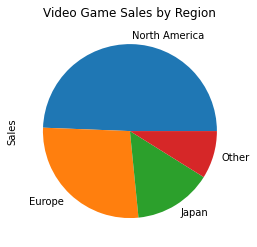

In [41]:
Region_Sales.groupby("Region")["Sales"].sum().sort_values(ascending = False).plot(kind = "pie")
plt.title("Video Game Sales by Region")
plt.savefig("Fig26.pdf",dpi=300, bbox_inches = "tight");

North America accounts for half of sales, Europe accounts for 25%, Japan accounts for about 14%, while Other accounts for 8% approximately.

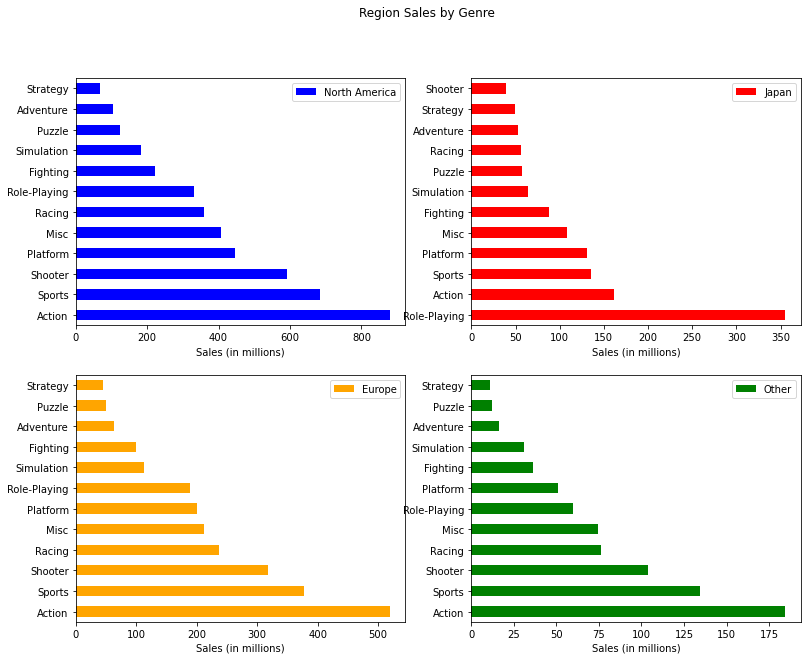

In [42]:
plt.figure(figsize = (13,10))
plt.subplot(2,2,1)
plt.suptitle("Region Sales by Genre")
vgsales.groupby("Genre")["NA_Sales"].sum().sort_values(ascending = False).plot(kind = "barh", color = "blue")
plt.xlabel("Sales (in millions)")
plt.ylabel("")
plt.legend(["North America"])

plt.subplot(2,2,2)
vgsales.groupby("Genre")["JP_Sales"].sum().sort_values(ascending = False).plot(kind = "barh", color = "red")
plt.legend(["Japan"])
plt.xlabel("Sales (in millions)")
plt.ylabel("")

plt.subplot(2,2,3)
vgsales.groupby("Genre")["EU_Sales"].sum().sort_values(ascending = False).plot(kind = "barh", color = "Orange")
plt.legend(["Europe"])
plt.xlabel("Sales (in millions)")
plt.ylabel("")

plt.subplot(2,2,4)
vgsales.groupby("Genre")["Other_Sales"].sum().sort_values(ascending = False).plot(kind = "barh", color = "Green")
plt.legend(["Other"])
plt.xlabel("Sales (in millions)")
plt.ylabel("")

plt.savefig("Fig28.pdf",dpi=300, bbox_inches = "tight");

Most popular genres are action, sports, and shooter. Japan loves role-playing games but doesn't like shooters. Least favorite genres are strategy, adventure, and puzzle.

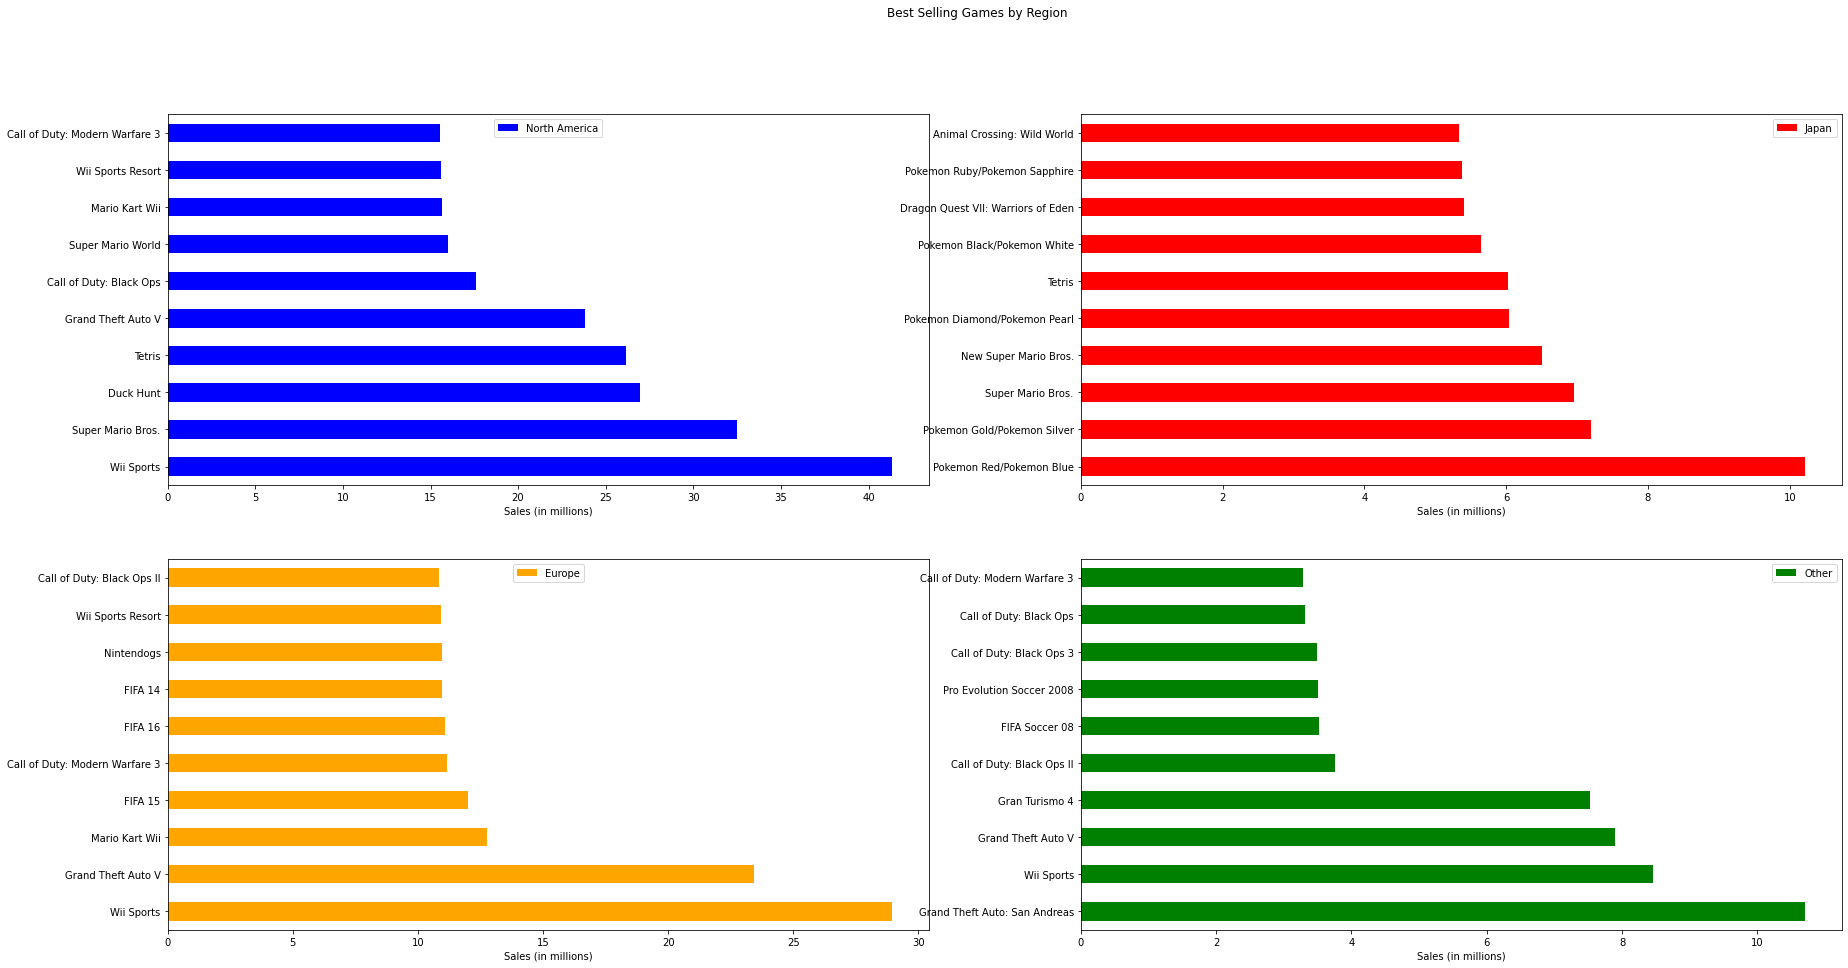

In [43]:
plt.figure(figsize = (30,15))
plt.subplot(2,2,1)
plt.suptitle("Best Selling Games by Region")
vgsales.groupby("Name")["NA_Sales"].sum().nlargest(10).sort_values(ascending = False).plot(kind = "barh", color = "blue")
plt.xlabel("Sales (in millions)")
plt.ylabel("")
plt.legend(["North America"], loc = "upper center")

plt.subplot(2,2,2)
vgsales.groupby("Name")["JP_Sales"].sum().nlargest(10).sort_values(ascending = False).plot(kind = "barh", color = "red")
plt.legend(["Japan"])
plt.xlabel("Sales (in millions)")
plt.ylabel("")

plt.subplot(2,2,3)
vgsales.groupby("Name")["EU_Sales"].sum().nlargest(10).sort_values(ascending = False).plot(kind = "barh", color = "Orange")
plt.legend(["Europe"], loc = "upper center")
plt.xlabel("Sales (in millions)")
plt.ylabel("")

plt.subplot(2,2,4)
vgsales.groupby("Name")["Other_Sales"].sum().nlargest(10).sort_values(ascending = False).plot(kind = "barh", color = "green")
plt.legend(["Other"])
plt.xlabel("Sales (in millions)")
plt.ylabel("")

plt.savefig("Fig29.pdf",dpi=300, bbox_inches = "tight");

Wii Sports and Grand Theft Auto V have sold very except for Japan. Japan likes Pokemon.

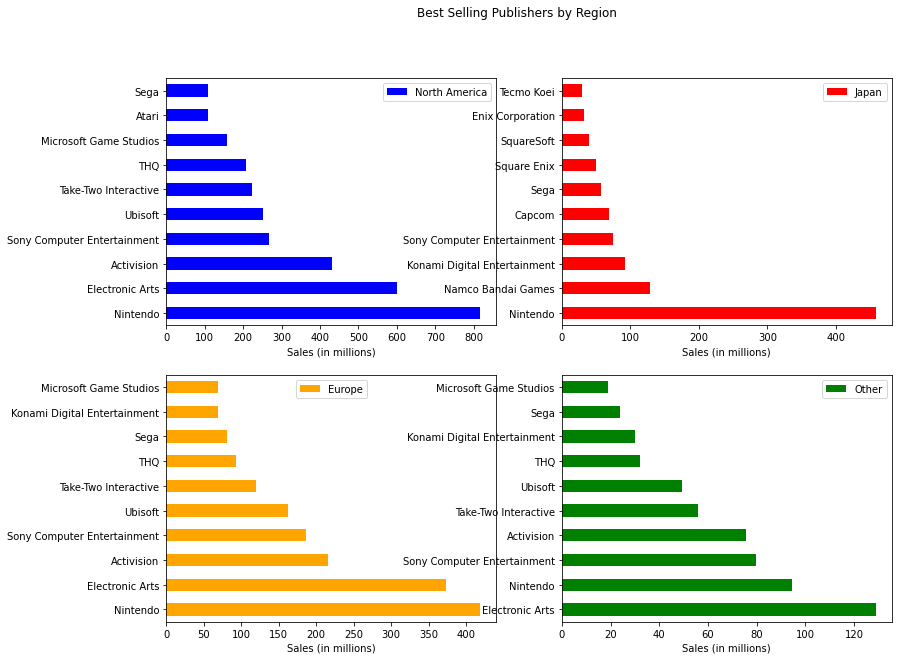

In [44]:
plt.figure(figsize = (13,10))
plt.subplot(2,2,1)
plt.suptitle("Best Selling Publishers by Region")
vgsales.groupby("Publisher")["NA_Sales"].sum().nlargest(10).sort_values(ascending = False).plot(kind = "barh", color = "blue")
plt.xlabel("Sales (in millions)")
plt.ylabel("")
plt.legend(["North America"])

plt.subplot(2,2,2)
vgsales.groupby("Publisher")["JP_Sales"].sum().nlargest(10).sort_values(ascending = False).plot(kind = "barh", color = "red")
plt.legend(["Japan"])
plt.xlabel("Sales (in millions)")
plt.ylabel("")

plt.subplot(2,2,3)
vgsales.groupby("Publisher")["EU_Sales"].sum().nlargest(10).sort_values(ascending = False).plot(kind = "barh", color = "Orange")
plt.legend(["Europe"], loc= "upper center")
plt.xlabel("Sales (in millions)")
plt.ylabel("")

plt.subplot(2,2,4)
vgsales.groupby("Publisher")["Other_Sales"].sum().nlargest(10).sort_values(ascending = False).plot(kind = "barh", color = "green")
plt.legend(["Other"])
plt.xlabel("Sales (in millions)")
plt.ylabel("")

plt.savefig("Fig30.pdf",dpi=300, bbox_inches = "tight");

Nintendo and Electronic Arts are popular publishers. Nintendo loves Japan compared to other publishers.